# Projet - détection de Buzz dans le réseau social Twitter


1.Introduction
    
    Twitter est un réseau social permettant le partage d'information sous forme de tweet qui sont des messages courts. La particularité de twitter est de pouvoir attacher à ce message des mots-clés (hashtag), qui peuvent alors être repris par d'autres utilisateurs, ou de pouvoir reprendre un message et le diffuser sur son propre compte, on parle alors de retweet. Avec la croissance du nombre d'utilisateurs, nous pouvons constater que certain messages et/ou information peuvent avoir un écho fort avec un impact sociétale. On parle alors de Buzz. 
    Cette étude à pour objectif de déterminer si un sujet en particulier, peut être considérer comme faisant Buzz ou non. Nous ferons cette étude sur une base de données de tweeter disponible sur le site de l'UCI(1). Ces données représentent 143000 tweets avec des indicateurs d'évolution sur certains critèes comme le nombre de discussions crées,...
    
    
2.Préliminaires
    
    2.1 Cadre général
    
    La notion de Buzz est mal définie dans la littérature et n'a pas de définition mathématique précise. On acceptera dans ce document que le Buzz représente l'acroissement rapide d'activité (Tweets, Retweets) sur une période donnée. 
    
    2.2 Description des données
    
    Les données sont extraites de la base de données de l'UCI qui ont servi de base pour l'étude menée par F. Kawala, A. Douzal-Chouakria, E. Gaussier, E. Dimert afin de prédire l'effet de Buzz dans les résaux Twitter et Tom's Hardware. Nous n'allons nous concentrer que sur l résau social Twitter qui est composé de 143000 tweets et 77 features, représentant en réalité que 11 features mesurées en 7 temps différents (7x11 = 77).
   

3.Visualisation des données
    
    3.1 Extraction des données
    Le code suivant permet d'extraire les données du fichier CSV et de les injecter dans un dataframe.

In [50]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import os

pathToDataset = "Twitter-Absolute-Sigma-500.csv"
data = pandas.read_csv(pathToDataset, sep=",",encoding="utf8")
data.head(30)

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,Annotation
0,889,939,960,805,805,1143,1121,549,613,587,...,1.000000,1.000000,889,939,960,805,805,1143,1121,1
1,542,473,504,626,647,795,832,366,288,318,...,1.000000,1.000000,542,473,504,626,647,795,832,1
2,92,99,196,100,184,79,162,66,59,118,...,1.000000,1.000000,92,99,196,100,184,79,162,0
3,90,87,92,344,184,848,184,83,78,76,...,1.000000,1.000000,90,87,92,344,184,848,184,1
4,169,98,101,90,96,95,185,141,68,85,...,1.000000,1.000000,169,98,101,90,96,95,185,1
5,775,765,935,806,912,1095,1198,614,588,751,...,1.000000,1.000000,775,765,935,806,912,1095,1198,1
6,469,1092,332,354,357,676,1189,348,909,261,...,1.000000,1.000000,469,1092,332,354,357,676,1189,1
7,818,693,756,1099,877,871,1409,578,516,546,...,1.000000,1.000000,818,693,756,1099,877,871,1409,1
8,832,628,898,944,993,983,1037,543,432,627,...,1.000000,1.000000,832,628,898,944,993,983,1037,1
9,920,1071,833,662,851,1096,1067,659,790,601,...,1.000000,1.013109,920,1071,833,662,851,1096,1068,1


    3.2 Description des variables
    
NCD : Number of created discussions
AI : Author increase
AS(NA) : Attention Level (measured with number of authors)
AS(NAC) : Attention Level (measured with number of contributions)
BL : Burstiness level
NAC : Number of Atomic Containers
CS : Contribution Sparseness 
AT : Author iteration
NA :  Number of Authors
ADL : Average Discussions Length
NAD : Average Discussions Length

Parmis ces variables 3 sont des indicateurs relatifs aux auteurs tandis que le reste, 8 variables donc, sont relatifs aux discussions. Dans l'étude qui suit, nous nous poserons la question lors de l'application de nos méthode d'identifier les variables significatives en ségrégant tout d'abord variables d'auteurs et variables de discussions, puis en les fusionnant.

Retirer des données à étudier la dernière colonne correspondant au résultat (buzz ou pas buzz)

****observation des données sous forme graphique et de leur évolution avec le temps
Nous allons dans un premier temps observer les données selon leur catorisation initiale afin de déterminer si par l'observation une intuition peut se dégager.


In [2]:
#normalisation de donnee par la moyenne
df_nonNormalized = data.iloc[:, :77]
print(df_nonNormalized.shape)
y = data.iloc[:,77]


cccolumn = df_nonNormalized
#cccolumn[cccolumn==0] = 1
stdColumns = cccolumn.std()
#stdColumns[stdColumns == 0] = 1
df_Normalized =(df_nonNormalized - df_nonNormalized.mean()) / stdColumns

(140707, 77)


# Quelques exemples 

In [12]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

# n : number of observations we wish to display
def plotBuzz(originalData,n,withbuzz,withoutbuzz):
    notbuzzindex = np.where(y==0)[0][0:n]
    buzzindex = np.where(y==1)[0][0:n]
    
    varsToDisplay= np.arange(0,77,7)
    variableNames = originalData.iloc[:,varsToDisplay].columns

    buzz = originalData.iloc[buzzindex,:]
    notbuzz = originalData.iloc[notbuzzindex,:]
    
    x= np.arange(0,7)
    gs = gridspec.GridSpec(6, 2)
    fig1 = plt.figure(num=1, figsize=(18, 20), dpi=80, facecolor='w', edgecolor='k')
    for i in range(0,7) :  
        if(i != 3):
            ax = fig1.add_subplot(gs[i])
            if withbuzz == 1 :
                ax.plot(x,buzz.iloc[:,i:i+7].transpose(),'-o', label = 'buzz')
            if withoutbuzz == 1 : 
                ax.plot(x,notbuzz.iloc[:,i:i+7].transpose(),'-^', label = 'no buzz')
            plt.xlabel('t', fontsize=18)
            ax.xaxis.set_label_coords(1.02, -0.025)
            plt.title(variableNames[i], fontsize=20, fontname="Bold")
            #ax.legend(loc='best')

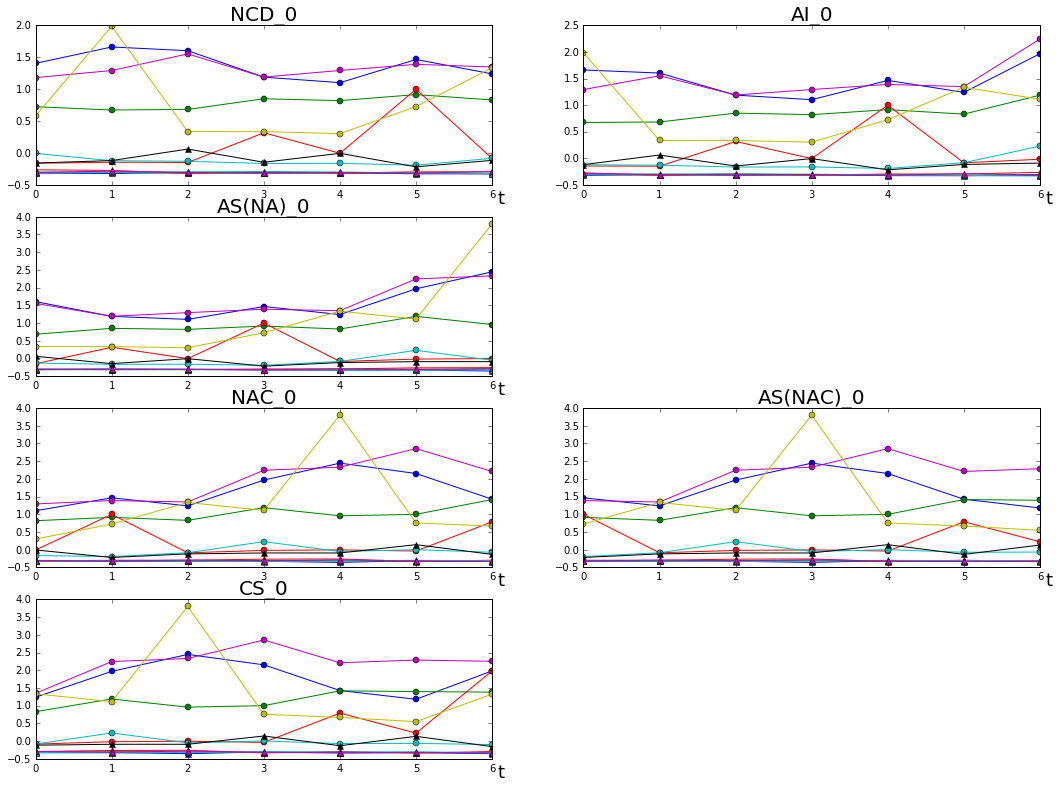

In [13]:
plotBuzz(df_Normalized,6,1,1)
#df_Normalized.iloc[:,0:7]
#np.where(y==0)[0][0:4]

L'observation nous permet de degager une observation majeur. L'etat de Buzz est soit une fonction croissante des variables AS, NA, NAC,AS(NAC). Ou un Buzz peut etre caracterise par la croissance soudaine d'une ou plusieurs variables.
En ce sens il est pertinent pour notre prediction de considerer les acroissements en T0 et T6. Nous considererons les accroissements entre la periode T0 et la valeur MAX atteinte entre T1 et T6.


In [24]:
indices_variables_auteurs = [7,49,56]
#ajoout de variable d'accroissement
t = []
for i in range(0,76) : 
    ind = i %7
    if(ind == 0):
        t.append(i)

t = np.asarray(t)

accroissements = pandas.DataFrame({})
for i in t :
    maxes = df_nonNormalized.iloc[:,i:i+7].max(1)
#    maxes = df_nonNormalized.iloc[:,i+6]
    cccolumn = df_nonNormalized.iloc[:,i]
    # Pour les variables qui commencent a 0, eviter de diviser par 0
    cccolumn[cccolumn==0] = 1
#    accroissements[i] = (maxes - df_nonNormalized.iloc[:,i])/column
    accroissements[i] = (maxes - cccolumn)/cccolumn*100 #df_nonNormalized.iloc[:,i+6]
accroissements.columns = df_nonNormalized.iloc[:,t].columns + "_increase"
#df_nonNormalized = pandas.concat([df_nonNormalized,accroissements],axis =1)

D:\PyEnsae\python\lib\site-packages\ipykernel\__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [25]:
accroissements.head(10)

,NCD_0_increase,AI_0_increase,AS(NA)_0_increase,BL_0_increase,NAC_0_increase,AS(NAC)_0_increase,CS_0_increase,AT_0_increase,NA_0_increase,ADL_0_increase,NAD_0_increase
0,28.571429,26.775956,23.972603,0,28.571429,28.507795,0,0.0000,23.899371,0.0000,28.571429
1,53.505535,48.907104,41.005803,0,53.505535,44.186047,0,0.0000,56.280193,0.0000,53.505535
2,113.043478,98.484848,164.102564,0,113.043478,173.529412,0,0.0000,94.666667,0.0000,113.043478
3,842.222222,738.554217,635.398230,0,842.222222,711.258278,0,0.0000,792.134831,0.0000,842.222222
4,9.467456,13.475177,16.867470,0,9.467456,14.285714,0,0.0000,12.883436,0.0000,9.467456
5,54.580645,34.853420,39.476961,0,54.580645,46.212121,0,0.0000,51.079137,0.0000,54.580645
6,153.518124,161.206897,108.409506,0,153.518124,105.300353,0,0.0000,138.274336,0.0000,153.518124
7,72.249389,107.266436,76.720901,0,72.249389,69.095477,0,0.0910,81.436314,0.0910,72.249389
8,24.639423,36.648250,19.385343,0,24.639423,15.479115,0,0.0000,26.718547,0.0000,24.639423
9,19.130435,23.065250,23.049220,0,19.130435,19.801980,0,1.2172,16.435185,1.3109,19.130435


# 3. Méthode 1 : K-NN neighbours classifier

In [26]:
from sklearn.cross_validation import KFold
from sklearn import neighbors
from sklearn.cross_validation import cross_val_predict
from sklearn.metrics import zero_one_loss
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_predict

#Cross-validation testing (using 5 folds)
def knnClassifier(data,y,n_jobs):
    scores = np.zeros((10,5))
    for n_neighbors in range(1,11):
        clf = neighbors.KNeighborsClassifier(n_neighbors, weights="uniform",metric="manhattan",p=2,n_jobs=n_jobs)
        predicted = cross_val_predict(clf, data,y, cv=5)
        scores[n_neighbors - 1] = 1 - zero_one_loss(y,predicted,normalize=True)
    mean_scores = scores.mean(1)
    kmax = mean_scores.argmax() 
    print("K choisi : ",kmax," pour le score : ", mean_scores[kmax -1])
    return(predicted)

    
def knnClassifierWithAccuracy(data,y,n_jobs):
    scores = np.zeros((10,5))
    accuracy = np.zeros(10)
    for n_neighbors in range(1,11):
        clf = neighbors.KNeighborsClassifier(n_neighbors, weights="uniform",metric="manhattan",p=2,n_jobs=n_jobs)
        y_predict = cross_val_predict(clf, data, y= y, cv=5)
        accuracy[n_neighbors - 1] = accuracy_score(y, y_predict)
    k = accuracy.argmax()
    print("K choisi : ",k," pour le score : ", accuracy[k])

In [27]:
#on run Knn sur nos variables d'accroissement
import timeit
start_time = timeit.default_timer()
cc= knnClassifier(accroissements,y,-1)
elapsed = timeit.default_timer() - start_time
print(elapsed,"seconds")

K choisi :  9  pour le score :  0.80364160987
277.0496935058029 seconds


In [28]:
len(cc)

140707

In [29]:
#on creer la matrice de confusion
from sklearn.metrics import confusion_matrix as cm
cm(y,cc)


array([[107483,   5449],
       [ 21419,   6356]])

TypeError: Image data can not convert to float

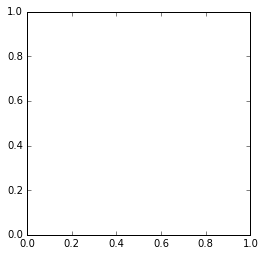

In [47]:
df_nonNormalized.iloc[0:4,indices[46:53]]

NameError: name 'indices' is not defined

# 1.Tentative de sélection de variables : Random Forest
On utilise le random forest sur toutes les variables à un seul instant (t=0) pour essayer de voir s'il y en a certaines qui se démarquent, en utilisant les importances de chacunes.

In [99]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=5,random_state=0)

forest.fit(df.iloc[:,t], y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
vraisIndices = t[indices]

NameError: name 'df' is not defined

NameError: name 'importances' is not defined

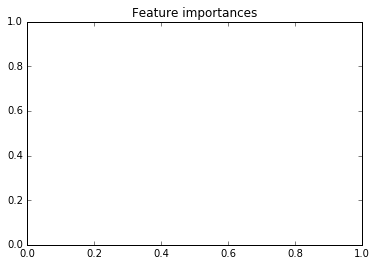

In [87]:
%matplotlib inline
plt.title("Feature importances")
plt.bar(range(1,len(t)), importances[indices][1:len(t)],
       color="r", yerr=std[indices[1:len(t)]], align="center")
plt.xticks(range(1,len(t)), df[vraisIndices[1:len(t)]].columns)

# Random forest sur toutes les variables

In [98]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=5,
                              random_state=0)

forest.fit(df_Normalized, y)
importances = forest.feature_importances_
#std = np.std([tree.feature_importances_ for tree in forest.estimators_],
 #            axis=0)
indices = np.argsort(importances)[::-1]

In [ ]:
%matplotlib inline
X = df_Normalized

#for f in range(X.shape[1]):
#    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
%matplotlib inline
plt.bar(range(X.shape[1]), importances[indices])
plt.title("Importance des variables ")

In [ ]:
%matplotlib inline
plt.bar(range(1,10), importances[indices][1:10])
plt.title("Importance des variables ")

In [ ]:
plt.title("Feature importances")
plt.bar(range(1,10), importances[indices][1:10],
       color="r", yerr=std[indices[1:10]], align="center")
plt.xticks(range(1,10), df[indices[1:10]].columns)

# Decision Tree Classifier

max_depth 1 erreur 0.42636977019 0.429206780714
max_depth 2 erreur 0.36516676942 0.367435476971
max_depth 3 erreur 0.36516676942 0.367435476971
max_depth 4 erreur 0.36516676942 0.367435476971
max_depth 5 erreur 0.364948841789 0.367991864942
max_depth 6 erreur 0.361752148013 0.366202567045
max_depth 7 erreur 0.357163389625 0.363487294564
max_depth 8 erreur 0.354360661725 0.362181490134
max_depth 9 erreur 0.351611017636 0.363842609697


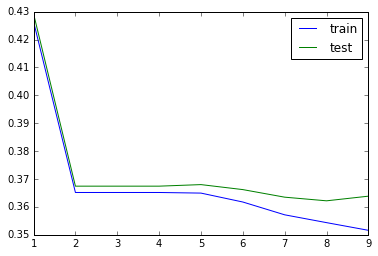

In [93]:
#sur les variables d'accroissements
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import train_test_split

a_train, a_test, b_train, b_test = train_test_split(accroissements, y, test_size=0.33)


curves = []
for max_depth in range(1,10) :
    clf = DecisionTreeClassifier(min_samples_leaf=10, max_depth=max_depth)
    clf = clf.fit(a_train, b_train)
    erra = mean_squared_error( clf.predict(a_train), b_train)**0.5
    errb = mean_squared_error( clf.predict(a_test), b_test)**0.5
    print("max_depth",max_depth, "erreur",erra,errb)
    curves.append((max_depth, erra,errb, clf) )
plt.plot ( [c[0] for c in curves], [c[1] for c in curves], label="train")
plt.plot ( [c[0] for c in curves], [c[2] for c in curves], label="test")
plt.legend()


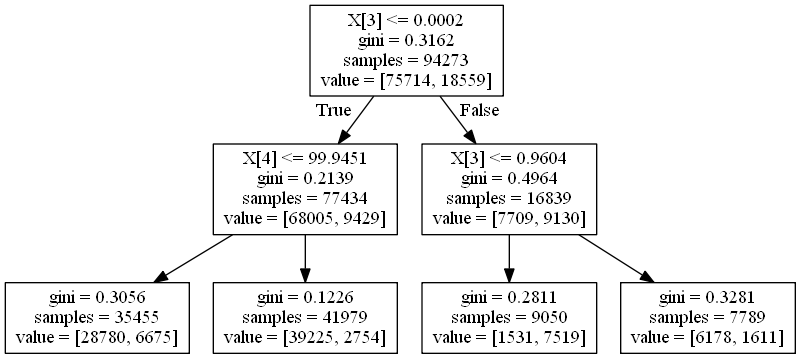

In [94]:
clf1 = DecisionTreeClassifier(min_samples_leaf=10, max_depth=2)
clf1 = clf1.fit(a_train, b_train)

from sklearn.tree import export_graphviz
export_graphviz(clf1, out_file="arbre1.dot")
# on remplace X[i] par les noms des variables
with open("arbre1.dot","r") as f: text = f.read()

with open("arbre1.dot","w") as f: f.write(text)
cwd = os.getcwd()
os.system ("\"D:\\PyEnsae\\tools\\Graphviz\\bin\\dot.exe\" -Tpng {0}\\arbre1.dot -o {0}\\arbre1.png".format(cwd))
from IPython.core.display import Image
Image("arbre1.png")

In [95]:
#Creation de la matrice de confusion
predicted = clf1.predict(a_test)
expected = b_test
cm(expected,predicted)


array([[36448,   770],
       [ 5499,  3717]])

Area under the ROC curve : 0.774320


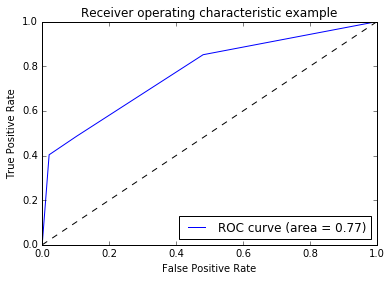

In [100]:
#ROC

from sklearn.metrics import roc_curve, auc
probas = clf1.predict_proba(a_test)
# probas est une matrice de deux colonnes avec la proabilités d'appartenance à chaque classe
fpr, tpr, thresholds = roc_curve(b_test, probas[:, 1])
roc_auc = auc(fpr, tpr)
print ("Area under the ROC curve : %f" % roc_auc)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

max_depth 1 erreur 0.206910206894 0.205399399455
max_depth 2 erreur 0.206910206894 0.205399399455
max_depth 3 erreur 0.190911862153 0.192909591131
max_depth 4 erreur 0.185586969666 0.18884788169
max_depth 5 erreur 0.185071846783 0.190776687511
max_depth 6 erreur 0.181921334515 0.188676746284
max_depth 7 erreur 0.175450673728 0.189132763255
max_depth 8 erreur 0.17206251018 0.19263029521
max_depth 9 erreur 0.164884806635 0.19568062634


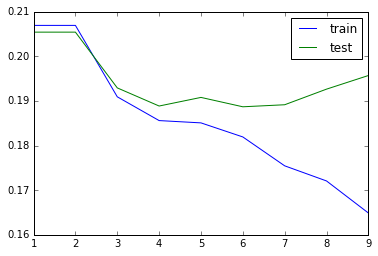

In [106]:
#Sur toutes les variables 
a_train, a_test, b_train, b_test = train_test_split(df_nonNormalized, y, test_size=0.33)
curves = []
for max_depth in range(1,10) :
    clf = DecisionTreeClassifier(min_samples_leaf=10, max_depth=max_depth)
    clf = clf.fit(a_train, b_train)
    erra = mean_squared_error( clf.predict(a_train), b_train)**0.5
    errb = mean_squared_error( clf.predict(a_test), b_test)**0.5
    print("max_depth",max_depth, "erreur",erra,errb)
    curves.append((max_depth, erra,errb, clf) )
plt.plot ( [c[0] for c in curves], [c[1] for c in curves], label="train")
plt.plot ( [c[0] for c in curves], [c[2] for c in curves], label="test")
plt.legend()

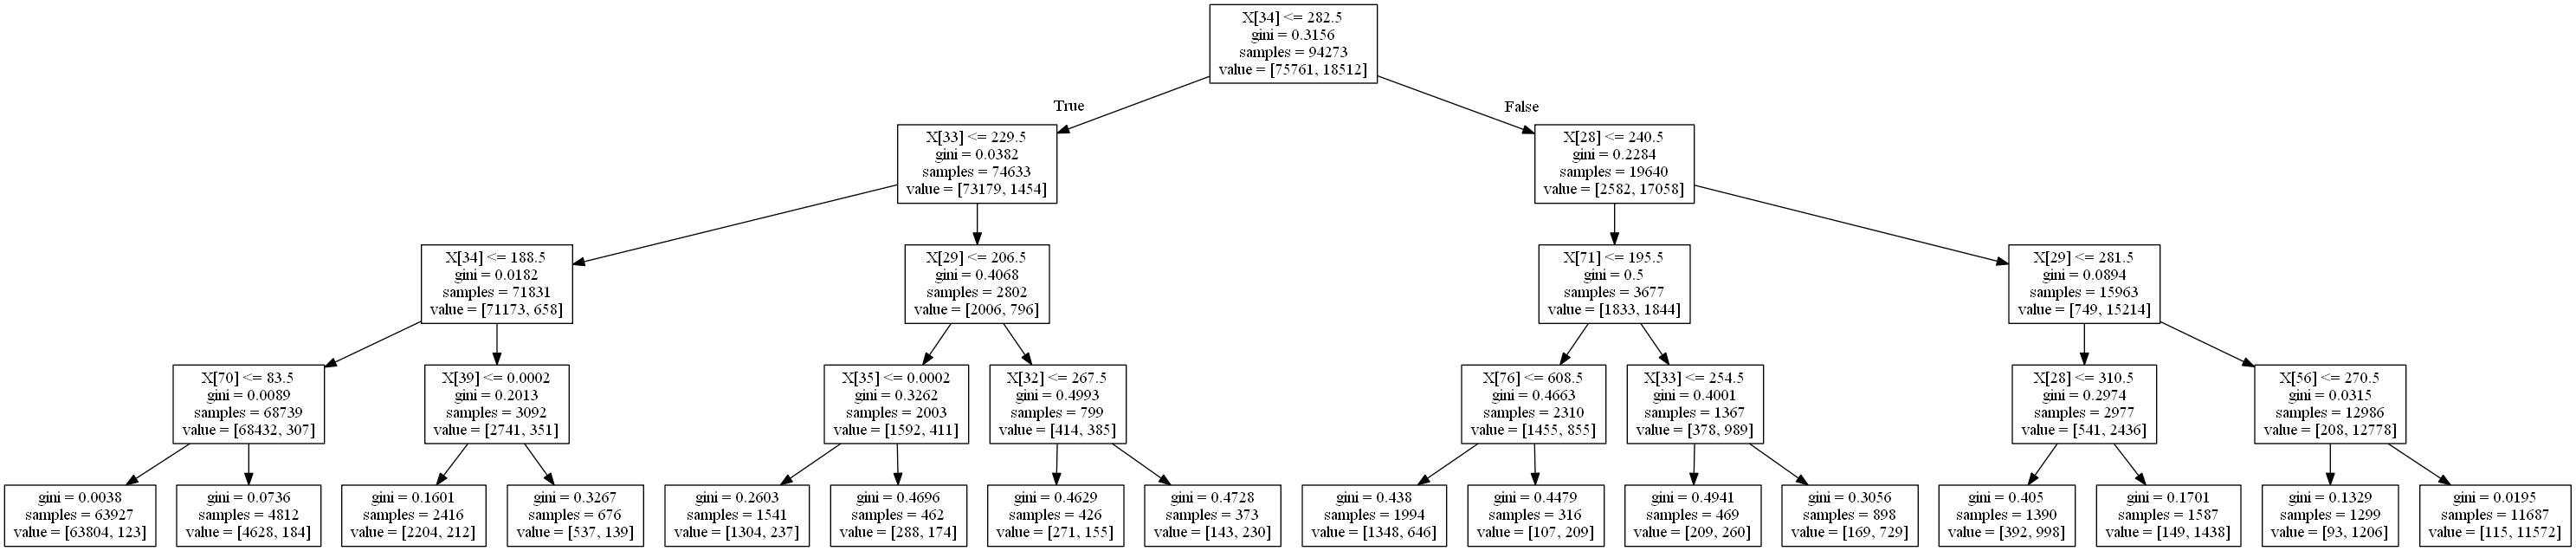

In [110]:
clf2 = DecisionTreeClassifier(min_samples_leaf=10, max_depth=4)
clf2 = clf2.fit(a_train, b_train)

from sklearn.tree import export_graphviz
export_graphviz(clf2, out_file="arbre2.dot")
# on remplace X[i] par les noms des variables
with open("arbre2.dot","r") as f: text = f.read()

with open("arbre2.dot","w") as f: f.write(text)
cwd = os.getcwd()
os.system ("\"D:\\PyEnsae\\tools\\Graphviz\\bin\\dot.exe\" -Tpng {0}\\arbre2.dot -o {0}\\arbre2.png".format(cwd))
from IPython.core.display import Image
Image("arbre2.png")

In [111]:
predicted = clf2.predict(a_test)
expected = b_test
cm(expected,predicted)

array([[36491,   680],
       [  976,  8287]])

Area under the ROC curve : 0.989213


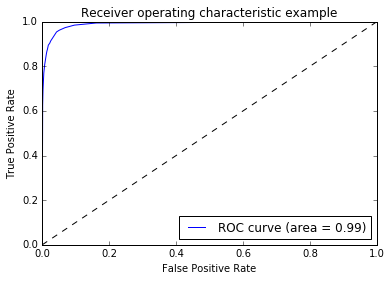

In [112]:

probas = clf2.predict_proba(a_test)
# probas est une matrice de deux colonnes avec la proabilités d'appartenance à chaque classe
fpr, tpr, thresholds = roc_curve(b_test, probas[:, 1])
roc_auc = auc(fpr, tpr)
print ("Area under the ROC curve : %f" % roc_auc)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

## Selection de features avec SelectModel

In [103]:
from sklearn.feature_selection import SelectFromModel
# threshold chosen is the mean (by default) (equivalent to importances[importances>np.mean(importances)])
model = SelectFromModel(forest, prefit=True)
X_new = model.transform(df)

NameError: name 'df' is not defined

In [19]:
test = pandas.DataFrame(X_new)
selectedVariables = df.columns[model.get_support(range(0,76))]

print("Les variables sélectionnées pour l'étude :",selectedVariables.tolist())


NameError: name 'X_new' is not defined

Classifier avec toutes les variables d'accroissements : 

NameError: name 'accroissements' is not defined

Classifier qu'avec  les variables d'accroissement d'auteurs :

In [ ]:
knnClassifier(accroissements.iloc[:,np.divide(indices_variables_auteurs,7)],y,-1)

Classifier qu'avec les variables liées aux discussions : 

In [ ]:
indices_contributions_variables = np.setdiff1d(np.arange(0,11),np.divide(indices_variables_auteurs,7))

In [ ]:
knnClassifier(accroissements.iloc[:,indices_contributions_variables],y,-1)

In [13]:
knnClassifier(df_Normalized.iloc[:,indices[43:46]],y,-1)

K choisi :  9  pour le score :  0.935120498625


# 4. Méthode 2 : SVM 

Nous utilisons ici un modèle SVM linéaire pour des raisons computationnelles.
Le temps de calcul d'un modèle SVM polynomial , de degré 3 par exemple, prend énormément de temps à "fitter" pour notre jeu de données.

In [23]:
from sklearn import svm
from sklearn.cross_validation import cross_val_score

def linearSVM(data,y):
    linear_svc = svm.LinearSVC(C=1,random_state=1234)

    scores = cross_val_score(linear_svc, data, y= y, cv=5,n_jobs=-1)
    print(scores.mean())

In [24]:
linearSVM(accroissements,y)

NameError: name 'accroissements' is not defined

In [ ]:
linearSVM(accroissements.iloc[:,indices_contributions_variables], y)

In [ ]:
linearSVM(accroissements.iloc[:,np.divide(indices_variables_auteurs,7)],y)